# Exploratory Analysis

In [1]:
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2
import os

In [2]:
!pwd

/Users/bingobango/code/lewagon/data-exploratory-analysis


In [3]:
from olist.data import Olist
data = Olist().get_data()

In [4]:
data

{'sellers':                              seller_id  seller_zip_code_prefix  \
 0     3442f8959a84dea7ee197c632cb2df15                   13023   
 1     d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
 2     ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
 3     c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
 4     51a04a8a6bdcb23deccc82b0b80742cf                   12914   
 ...                                ...                     ...   
 3090  98dddbc4601dd4443ca174359b237166                   87111   
 3091  f8201cab383e484733266d1906e2fdfa                   88137   
 3092  74871d19219c7d518d0090283e03c137                    4650   
 3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
 3094  9e25199f6ef7e7c347120ff175652c3b                   12051   
 
             seller_city seller_state  
 0              campinas           SP  
 1            mogi guacu           SP  
 2        rio de janeiro           RJ  
 3             sao paul

Each transaction on the Olist ecommerce platform is characterized by:
- a `customer_id`, that would buy...
- various`product_id`...
- to a `seller_id`...
- and leaves a `rewiew_id`...
- all this belonging to an `order_id`

## 1 - Run an automated exploratory analysis with [pandas profiling](https://github.com/pandas-profiling/pandas-profiling)

In [5]:
# First, let's install the pandas-profiling package
! pip install --quiet pandas==1.4.4 ydata_profiling==4.1.2


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [6]:
# Then create a "reports" directory
!mkdir reports

mkdir: reports: File exists


In [7]:
# let's import ProfileReport from ydata_profiling
from ydata_profiling import ProfileReport

# choose which datasets to profile
datasets_to_profile = ['orders', 'products', 'sellers',
                  'customers', 'order_reviews',
                  'order_items']

👉 Create and save one `html report` per dataset to profile 

⏳ (It usually takes a few minutes)

In [8]:
for d in datasets_to_profile:
    print('exporting: '+ d)
    profile = ProfileReport(data[d], title = d)
    profile.to_file(f"reports/{d}_report.html")

exporting: orders


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

exporting: products


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

exporting: sellers


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

exporting: customers


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

exporting: order_reviews


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

exporting: order_items


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 2 - Investigate the cardinalities of your various DataFrames

❓ **How many unique `orders`, `reviews`, `sellers`, `products` and `customer` is there ?**  
(You can use pandas profiling or pandas methods on your notebook if you prefer)

In [9]:
aggregates = np.array([
    [
        data["orders"].order_id.nunique(),
        data["order_reviews"].review_id.nunique(),
        data["sellers"].seller_id.nunique(),
        data["products"].product_id.nunique(),
        data["customers"].customer_id.nunique(),
    ],
    [
        data["orders"].order_id.count(),
        data["order_reviews"].review_id.count(),
        data["sellers"].seller_id.count(),
        data["products"].product_id.count(),
        data["customers"].customer_id.count(),
    ],
])

In [21]:
aggregates

array([[99441, 98410,  3095, 32951, 99441],
       [99441, 99224,  3095, 32951, 99441]])

In [25]:
pd.DataFrame(data=np.vstack((aggregates, aggregates[0,:] / aggregates[1,:])).T,
            index=['orders', 'reviews', 'sellers', 'products', 'customers'],
            columns=['nuinque', 'count', 'ratio'])

,nuinque,count,ratio
orders,99441.0,99441.0,1.000000
reviews,98410.0,99224.0,0.991796
sellers,3095.0,3095.0,1.000000
products,32951.0,32951.0,1.000000
customers,99441.0,99441.0,1.000000


❓ **How many reviews is there per order? Do we have reviews for all orders ?**
<details>
    <summary markdown='span'>Hints</summary>

This info is not directly accessible in your individual csv. You'll need to proceed to merge
</details>

In [26]:
orders = data['orders'][['customer_id', 'order_id']]
reviews = data['order_reviews'][['order_id', 'review_id']]
# items = data['order_items'][['order_id', 'product_id','seller_id']]

In [27]:
orders_reviews = orders.merge(reviews, on='order_id', how='outer')
orders_reviews.head(2)

,customer_id,order_id,review_id
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,a54f0611adc9ed256b57ede6b6eb5114
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,8d5266042046a06655c8db133d120ba5


In [32]:
orders_reviews.isna().sum()

customer_id      0
order_id         0
review_id      768
dtype: int64

☝️ Nearly all orders have a review, except 768 out of 100k (less than 0.7% missing)

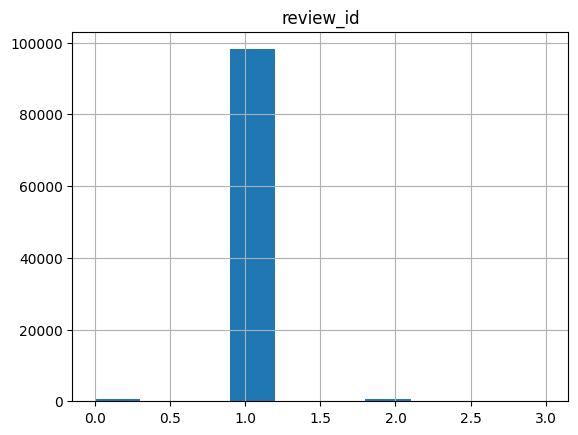

In [8]:
%matplotlib inline

# Check for max number of reviews per order
orders_reviews.groupby(["order_id", "customer_id"]).count().hist();

In [10]:
orders_reviews.groupby(["order_id", "customer_id"]).count().sum()

review_id    99224
dtype: int64

🧪 **Test your code below**

Store the number of orders with missing reviews as `int` in a variable named `n_missing_reviews`

In [37]:
n_missing_reviews = orders_reviews.isna().sum()['review_id']

In [38]:
from nbresult import ChallengeResult

result = ChallengeResult('exploratory',
    n=n_missing_reviews
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/bingobango/.pyenv/versions/tom/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bingobango/code/lewagon/data-exploratory-analysis/tests
plugins: anyio-3.6.1, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 1 item

test_exploratory.py::TestExploratory::test_n_missing_reviews PASSED      [100%]

============================== 1 passed in 0.11s ===============================


💯 You can commit your code:

git add tests/exploratory.pickle

git commit -m 'Completed exploratory step'

git push origin master

